La regressione lineare semplice è il primo modello di machine learning che si apprende, si tratta di trasformare i dati in punti su un grafico, dove gli input sono collegati ai target e trovare una funzione lineare capace di approssimare nel modo migliore i risultati.
Per verificare la buona riuscita si utilizzano delle metriche capaci di verificare l'errore e di dare un punteggio alla variabilità del modello.
Ma iniziamo con un esempio a 2 dimensioni

In [1]:
import pandas as pd

il csv è separato da virgola, quindi non ho bisogno di modificare il parametro sep, userò la colonna 0 (TV) e la colonna 3 (Sales) e addestrerò un modello lineare che associa le vendite alle pubblicità in TV

In [2]:
advertising = pd.read_csv('../00-data/advertising.csv', usecols=[0,3]) #names=['Television', 'Sales']

advertising

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [3]:
advertising.shape

(200, 2)

In [4]:
#suddivido variabile indipendente da target
target = 'Sales'
X = advertising.drop(target, axis=1).values
y = advertising[target].values

print(X)
print(y)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [5]:
from sklearn.model_selection import train_test_split

splitto i dataset di train e test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


addestro il mio modello lineare

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
X_train

array([[149.7],
       [ 74.7],
       [121. ],
       [ 44.5],
       [ 97.2],
       [ 18.7],
       [ 38. ],
       [ 16.9],
       [ 62.3],
       [110.7],
       [ 85.7],
       [116. ],
       [ 88.3],
       [120.2],
       [ 25.6],
       [280.2],
       [238.2],
       [ 13.1],
       [ 17.9],
       [137.9],
       [195.4],
       [239.9],
       [219.8],
       [187.9],
       [187.8],
       [142.9],
       [135.2],
       [ 44.7],
       [ 43.1],
       [222.4],
       [228. ],
       [175.7],
       [129.4],
       [  0.7],
       [ 80.2],
       [136.2],
       [296.4],
       [ 93.9],
       [276.9],
       [222.4],
       [206.9],
       [ 13.2],
       [  4.1],
       [ 18.8],
       [214.7],
       [184.9],
       [ 76.3],
       [ 76.4],
       [241.7],
       [120.5],
       [ 75.3],
       [ 25.1],
       [253.8],
       [ 75.1],
       [193.2],
       [234.5],
       [  7.8],
       [ 17.2],
       [ 69. ],
       [  5.4],
       [  8.4],
       [248.8],
       [

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [10]:
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

print(f"mse: {mse}, r2s: {r2s}")

mse: 5.329326204673994, r2s: 0.7727692185256725


andiamo a mostrare graficamente il risultato

In [12]:
import matplotlib.pyplot as plt

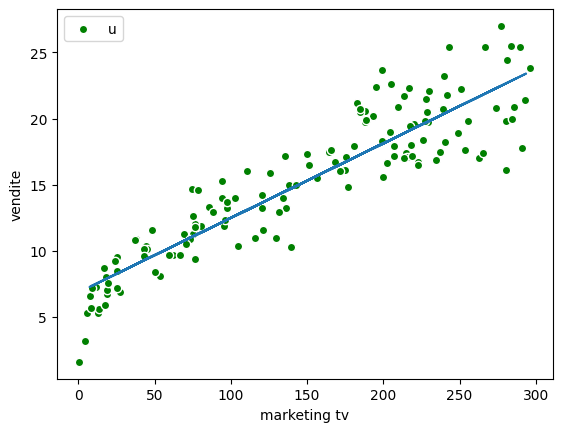

In [13]:
plt.scatter(X_train, y_train, c="green", edgecolor="white", label="marketing in tv per vendite")
plt.xlabel('marketing tv')
plt.ylabel('vendite')
plt.legend('up left')
plt.plot(X_test, y_pred)

In [14]:
print(f"coef: {lr.coef_[0]}, intercepta: {lr.intercept_}")

coef: 0.05635917859224704, intercepta: 6.850696587815577
